In [1]:
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
NAME = 'DenseNet121_paper_e1_c4_p4_bs128'
LOAD_PATH = '/home/angel00540/work_/work/cgh_2020/paper_e1/part_4.npz'
TEST_PATH = '/home/angel00540/work_/work/cgh_2020/paper_e1/'
SAVE_MODEL='DenseNet121_paper_e1_c4_p4_bs128_data_0115_2052.26-0.95-0.07.hdf5'
WEIGHT_PATH = '/home/angel00540/work_/work/cgh_2020/paper_e1/weight/'+SAVE_MODEL
OUT_PATH='/home/angel00540/work_/work/cgh_2020/paper_e1/tflite_model/DenseNet121_paper_e1_c4_p4_bs128_data_0115_2052.26-0.95-0.07.tflite'
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

2022-03-10 13:39:31.460948: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
classes = []
labels = [ 'Velar', 'Stopping','Affricate','Consonant vowel']
for n, _, _ in os.walk(os.path.abspath(TEST_PATH+'/ori/')):
    classes.append(n.split('/')[-1])

classes = classes[1:]
classes = [int(x) for x in classes]
classes.sort()

classes = [str(x) for x in classes]

print(f'classes : {classes}')
print(f'label : {labels}')

classes : ['4', '6', '7', '14']
label : ['Velar', 'Stopping', 'Affricate', 'Consonant vowel']


In [3]:
model = load_model(WEIGHT_PATH)
model.summary()

2022-03-10 13:40:13.354538: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-10 13:40:13.414519: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-10 13:40:13.573249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3e:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-10 13:40:13.573334: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-10 13:40:13.745604: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-10 13:40:13.745652: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(OUT_PATH, 'wb') as f:
  f.write(tflite_model)

2022-03-07 00:13:07.316730: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpb7f4poa2/assets


2022-03-07 00:13:29.908826: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2022-03-07 00:13:29.909105: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-03-07 00:13:29.909894: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-07 00:13:29.911015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3e:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-07 00:13:29.912467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:b2:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-07 00:13:29.912498: I tensorflow/s

In [4]:
def get_dataset(PATH):

    x = np.load(PATH, mmap_mode='r', allow_pickle=True)
    # x_train = x['x_train']
    # y_train = x['y_train']
    x_test = x['x_test']
    y_test = x['y_test']

    x_test.astype('float16')
    y_test.astype('float16')

    # total = len(y_train)
    # unique, counts = np.unique(y_train, return_counts=True)
    # class_weight = dict(zip(unique, counts))
    # for l in class_weight:
    #     w = class_weight[l]
    #     new = (1 / w)*(total)/2.0
    #     print('l: ', l, ' new: ', new)
    #     class_weight.update({l: new})

    # x_train = x_train.reshape(x_train.shape[0], INPUT_X, INPUT_Y, INPUT_Z)
    # y_train = to_categorical(y_train, num_classes=classes)
    print("x_test.shape:", x_test.shape)
#     x_test = x_test.reshape(x_test.shape[0], INPUT_X, INPUT_Y, INPUT_Z)

    # y_test = to_categorical(y_test, num_classes=classes)


    return(x_test, y_test)

In [5]:
x_test, y_test = get_dataset(LOAD_PATH)

x_test.shape: (5075, 128, 128, 3)


In [6]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=OUT_PATH)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
x_test.shape

(5075, 128, 128, 3)

In [11]:
tmp_test = tf.expand_dims(x_test[0], axis=0)
tmp_test.shape

TensorShape([1, 128, 128, 3])

In [8]:
ans = []
for i in range(len(x_test)):
    tmp = tf.expand_dims(x_test[i], axis=0)
   
    input_data = np.array(tmp, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    ans.append(output_data)
    print('.', end='')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
ans[1]

array([[9.9999952e-01, 4.1463957e-10, 8.6903235e-11, 4.2319706e-07]],
      dtype=float32)

In [40]:
ans_array = np.asarray(ans)

In [41]:
ans_array.shape

(5075, 1, 4)

In [42]:
asdafa = ans_array[:,0,:]
ans_array = ans_array.reshape(ans_array.shape[0],ans_array.shape[2])

In [43]:
(ans_array == asdafa).all()

True

In [45]:
y_pred = np.argmax(ans_array,axis=1)
y_true = y_test

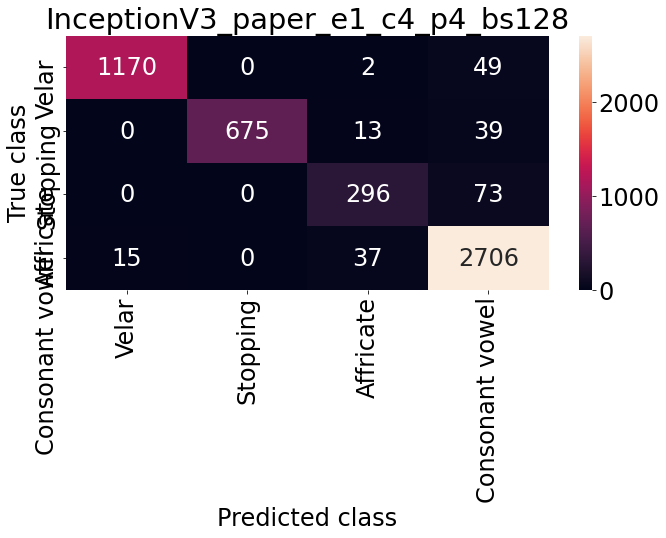

In [52]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 24})
sns.heatmap(confusion_mtx, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title(NAME)
plt.tight_layout()
plt.show()
# plt.savefig(NAME+'.svg')  # , bbox_inches='tight', facecolor='w'

In [53]:
y_true = to_categorical(y_true,len(classes))
y_pred = to_categorical(y_pred,len(classes))

In [54]:
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print('Accuracy: ',m.result().numpy())

Accuracy:  0.9775369


In [55]:
m = tfa.metrics.F1Score(num_classes=len(classes), threshold=0.5)
m.update_state(y_true, y_pred)
print('F1Score',m.result().numpy())

NameError: name 'tfa' is not defined

In [56]:
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print('Precision',m.result().numpy())

Precision 0.9550739


In [57]:
m = tf.keras.metrics.Recall()
m.update_state(y_true, y_pred)
print('Recall',m.result().numpy())

Recall 0.9550739


In [58]:
m = tf.keras.metrics.AUC()
m.update_state(y_true, y_pred)
print('AUC',m.result().numpy())

AUC 0.97004926
